#Importing libraries here

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**DATASETS** :

We have used four datasets here :

1. EIL51
2. SP11
3. UK12
4. SGB128


#Importing **EIL51** dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EIL51.csv to EIL51.csv


In [ ]:
df1 = pd.read_csv("EIL51.csv")  #reading the dataset and storing in df
df1

,Unnamed: 0,Debri,x,y
0,0,1,37,52
1,1,2,49,49
2,2,3,52,64
3,3,4,20,26
4,4,5,40,30
5,5,6,21,47
6,6,7,17,63
7,7,8,31,62
8,8,9,52,33
9,9,10,51,21


#Importing **SP11** dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SP11.csv to SP11.csv


In [ ]:
df2 = pd.read_csv("SP11.csv")  #reading the dataset and storing in df
df2

,Debri,x,y
0,1,-0.000031,-0.000019
1,2,-14.805800,-0.000037
2,3,-45.675500,-9.743800
3,4,-30.670300,-2.023360
4,5,12.520900,-13.364900
5,6,-46.396600,-9.178760
6,7,-34.701800,13.490000
7,8,-6.157040,2.205890
8,9,-8.022440,-1.352900
9,10,-27.962700,-17.057700


#Importing **UK12** dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving uk12.csv to uk12.csv


In [ ]:
df3 = pd.read_csv("uk12.csv")  #reading the dataset and storing in df
df3

,Debri,x,y
0,1,0.00019,-0.000286
1,2,383.45800,-0.000609
2,3,-27.02060,-282.758000
3,4,335.75100,-269.577000
4,5,69.43310,-246.780000
5,6,168.52100,31.401200
6,7,320.35000,-160.900000
7,8,179.93300,-318.031000
8,9,492.67100,-131.563000
9,10,112.19800,-110.561000


#Importing **SGB128** dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sgb128.csv to sgb128.csv


In [ ]:
df4 = pd.read_csv("sgb128.csv")  #reading the dataset and storing in df
df4

,Debri,x,y
0,1,-5572.57,2839.81
1,2,-6729.21,2962.82
2,3,-8326.72,3219.84
3,4,-4961.07,2920.67
4,5,-6202.70,3014.64
...,...,...,...
123,124,-8278.33,2730.66
124,125,-7230.86,3483.78
125,126,-8446.23,2776.26
126,127,-5246.43,2786.63


#**Double Elliptical Transfer**



In astronautics and aerospace engineering, the Double-elliptical transfer is an orbital maneuver that moves a spacecraft from one orbit to another using a third orbit.

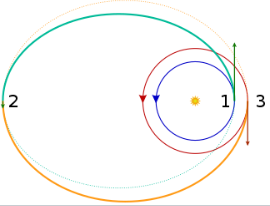   
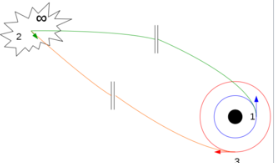

In [ ]:
#main satellite : (x,y)
#debris : (m,n)
#use this when r1/r2 > 15.58
import math
def double_elliptical_transfer(r1,r2):
  G = 6.673*(10**-11)
  p1=3.14
  alpha=0.7  #alpha is used to weight the velocity 
  beta=0.3   #beta is used to weight the time 
  mu=G       #mu=GM is the standard gravitational parameter of the primary body
  e=(r1/r2)
  r=r2*(1+e) #r is the distance of the orbiting body from the primary, i.e., the radius

  delta_V1=(math.sqrt(mu/r1))*((math.sqrt((2*r2)/(r1+r2)))-1) #a prograde burn
  delta_V2=(math.sqrt(mu/r))*((math.sqrt((2*r2)/(r+r2)))-(math.sqrt((2*r1)/(r+r1)))) #a second prograde burn
  delta_V3=(math.sqrt(mu/r2))*((math.sqrt((2*r)/(r+r2)))-1) #a retrograde burn
  V_c=abs(delta_V1) + abs(delta_V2) + abs(delta_V3) #Velocity
  t_c=p1*(math.sqrt((r1+r)**3) + ((math.sqrt((r2+r)**3))/(2*math.sqrt(2*mu)))) #Transfer time
  C=alpha*V_c + beta*t_c #Cost is a linear function of velocity and time
  return C

#**Homan Elliptical Transfer**

the Hohmann transfer orbit is an elliptical orbit used to transfer between two circular orbits of different radii around a central body in the same plane that is sometimes tangential to both. The Hohmann transfer often uses the lowest possible amount of propellant in traveling between these orbits, but bi-elliptic transfers can use less in some cases.

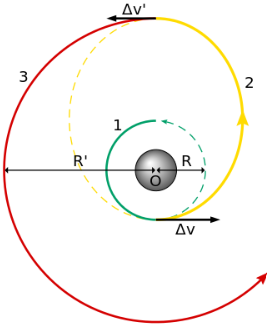

In [ ]:
#main satellite : (x,y)
#debris : (m,n)
#use this when r1/r2 < 11.94
import math
def homan_transfer(r1,r2):
  G = 6.673*(10**-11)
  p1=3.14
  alpha=0.7 #alpha is used to weight the velocity 
  beta=0.3 #beta is used to weight the time
  mu=G #mu=GM is the standard gravitational parameter of the primary body
  delta_V1=(math.sqrt(mu/r1))*((math.sqrt((2*r2)/(r1+r2)))-1) #a prograde burn
  delta_V2=(math.sqrt(mu/r2))*((math.sqrt((2*r1)/(r1+r2)))-1) #a retrograde burn
  V_h=abs(delta_V1) + abs(delta_V2) #Velocity
  t_h=p1*(math.sqrt((r1+r2)/(8*mu))) #Transfer time
  C=alpha*V_h + beta*t_h #Cost is a linear function of velocity and time
  return C

#**Fitness Function**

Considering the limitation of the number of propulsive satellites, time and fuel, the genetic algorithm is applied to design the optimal trajectory.

The distances of debris are dynamically changing with time, So consideration of their velocities with time is important.


After moving debris to lower earth orbit, it is important for sub-satellite to return to main satellite making this problem a Dynamic Multiple Travelling Salesman Problem.

The main idea is to use the fuel efficiently which can be done by minimizing the distance travelled by the sub-satellite.

For dynamically changing distances, the Cost of fuel is described as a linear function of change in velocity and change in time.

F(x,y)=αΔV + βΔT, α and β are energy and time impact factor and F is fuel consumed from orbit x to orbit y.

In [ ]:
# Considering Main Satellite is at Origin so m=0 and n=0
def calcFitness(chromo,df):
  m=0 #main satellite x coordinate
  n=0 #main satellite y coordinate
  fitness_value = 0
  for i in range(len(chromo)-1):
    x1 = df.at[chromo[i],'x']
    y1 = df.at[chromo[i],'y']
    x2 = df.at[chromo[i+1],'x']
    y2 = df.at[chromo[i+1],'y']
    r1 = np.sqrt((x1-m)**2 + (y1-n)**2) # radius till first debris
    r2 = np.sqrt((x2-m)**2 + (y2-n)**2) # radius till second debris
    m=x1 #second debris x coordinate
    n=y1 #second debris y coordinate
    if(r1/r2 < 11.94):
      val = homan_transfer(r1,r2)
      fitness_value = fitness_value + val
    elif(r1/r2 > 15.58):
      val = double_elliptical_transfer(r1,r2)
      fitness_value = fitness_value + val
  return fitness_value

#**Function for Initial Population**

In [ ]:
def population(df,Population_Size):
  length_of_chromosome=len(df)
  population = []
  for i in range(Population_Size):
    chromosome =  random.sample(range(0,length_of_chromosome),length_of_chromosome) # Create Random Chromosomes
    population.append(chromosome)
  return population 

#**Tournament Selection**

Tournament selection is a method of selecting an individual from a population of individuals in a genetic algorithm.Tournament selection involves running a tournaments among individuals chosen from the population. The winner of each tournament (the one with the best fitness) is selected for crossover.

In [ ]:
def tournament_selection(population):
  population.sort() #Sorted based on fitness value
  winners = []
  for i in range(0,math.floor(len(population)/2)): #half population is a winner
    winners.append(population[i]) #best are stored
  return winners

#**Cross-Over**

Crossover technique is a novel approach discussed in paper :

S. Akter, N. Nahar, M. ShahadatHossain and K. Andersson, "A New Crossover Technique to Improve Genetic Algorithm and Its Application to TSP," 2019 International Conference on Electrical, Computer and Communication Engineering (ECCE), 2019, pp. 1-6, doi: 10.1109/ECACE.2019.8679367.

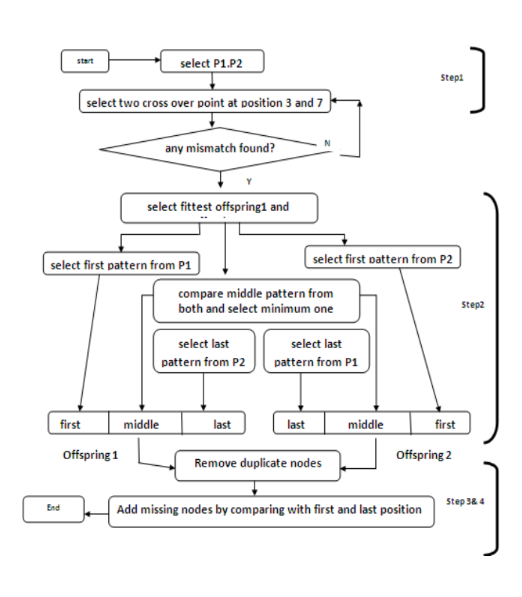

In [ ]:
def crossover(p1, p2,rate,df):
  w1=rate*100
  w2=(1-rate)*100
  r=random.choices(['True','False'],weights=(w1,w2),k=1) #assigning crossover probability 
  par1=p1[1] 
  par2=p2[1] 
  if(r==['True']):
    cost1=p1[0]
    cost2=p2[0]
    #Step 1 : Two crossover points are selected at random
    a=random.randint(0,len(df)-1)
    b=random.randint(0,len(df)-1)
    if(a<=b):
      point1=a
      point2=b
    else:
      point2=a
      point1=b
    child1=p1
    child2=p2
    subsection1=[]
    subsection2=[]

    #Step 2 :Select the first pattern from P1 and these need to be added to the offspring1. Afterwards compare middle pattern from both P1 and P2, and select the one having 
    #lowest cost and add to the offspring1. Again select the last pattern from P2 which fill the chromosome size. Again we do the same thing to create offspring2, where we select
    #pattern from P2, middle pattern by comparing both from P1 and P2 and select the one having minimum cost and then select last part from P1.

    for i in range(a,b+1):
      subsection1.append(p1[1][i])
      subsection2.append(p2[1][i])
    cost_subsection1=calcFitness(subsection1,df)
    cost_subsection2=calcFitness(subsection2,df)
    if(cost_subsection1 <= cost_subsection2):
      final_section=subsection1
    else:
      final_section=subsection2
    for i in range(a,b+1):
      child1[1][i]=final_section[i-a]
      child2[1][i]=final_section[i-a]
    for i in range(b,len(df)):
      child1[1][i]=p2[1][i-b]
      child2[1][i]=p1[1][i-b]

    #Step 3: Remove the duplicate nodes.

    child1_noduplicate = []
    child2_noduplicate = []
    [child1_noduplicate.append(x) for x in child1[1] if x not in child1_noduplicate]
    [child2_noduplicate.append(x) for x in child1[1] if x not in child2_noduplicate]
    duplicate_count=[]
    for i in range(0,len(df)):
      duplicate_count.append(i)

    #Step 4: Now we have to find out the missing nodes.

    for i in child1_noduplicate:
      duplicate_count.remove(i)
    for i in duplicate_count:
      list1=[]
      list1.append(i)
      list1.append(child1_noduplicate[0])
      list2=[]
      list2.append(child1_noduplicate[len(child1_noduplicate) - 1])
      list2.append(i)
      c1=calcFitness(list1,df)
      c2=calcFitness(list2,df)
      if(c2 <= c1):
        child1_noduplicate.append(i)
      else:
        child1_noduplicate.insert(0, i)

    duplicate_count=[]
    for i in range(0,len(df)):
      duplicate_count.append(i)
    
    for i in child2_noduplicate:
      duplicate_count.remove(i)
    
    for i in duplicate_count:
      list1=[]
      list1.append(i)
      list1.append(child2_noduplicate[0])
      list2=[]
      list2.append(child2_noduplicate[len(child2_noduplicate) - 1])
      list2.append(i)
      c1=calcFitness(list1,df)
      c2=calcFitness(list2,df)
      if(c2 <= c1):
        child2_noduplicate.append(i)
      else:
        child2_noduplicate.insert(0, i)

    return child1_noduplicate,child2_noduplicate

  else: #if no crossover
    par1_noduplicate = []
    par2_noduplicate = []
    [par1_noduplicate.append(x) for x in par1 if x not in par1_noduplicate]
    [par2_noduplicate.append(x) for x in par2 if x not in par2_noduplicate]
    duplicate_count=[]
    for i in range(0,len(df)):
      duplicate_count.append(i)
    
    for i in par1_noduplicate:
      if(duplicate_count.count(int(i))==1):
        duplicate_count.remove(i)
    for i in duplicate_count:
      list1=[]
      list1.append(i)
      list1.append(par1_noduplicate[0])
      list2=[]
      list2.append(par1_noduplicate[len(par1_noduplicate) - 1])
      list2.append(i)
      c1=calcFitness(list1,df)
      c2=calcFitness(list2,df)
      if(c2 <= c1):
        par1_noduplicate.append(i)
      else:
        par1_noduplicate.insert(0, i)

    duplicate_count=[]
    for i in range(0,len(df)):
      duplicate_count.append(i)
    
    for i in par2_noduplicate:
      if(duplicate_count.count(int(i))==1):
        duplicate_count.remove(i)
    
    for i in duplicate_count:
      list1=[]
      list1.append(i)
      list1.append(par2_noduplicate[0])
      list2=[]
      list2.append(par2_noduplicate[len(par2_noduplicate) - 1])
      list2.append(i)
      c1=calcFitness(list1,df)
      c2=calcFitness(list2,df)
      if(c2 <= c1):
        par2_noduplicate.append(i)
      else:
        par2_noduplicate.insert(0, i)

    return par1_noduplicate,par2_noduplicate

#**Function for Mutation**

In [ ]:
def mutation(parentx,rate,df):
  w1=rate*100
  w2=(1-rate)*100
  r=random.choices(['True','False'],weights=(w1,w2),k=1) # assigning mutation probability
  par1=parentx
  if(r==['True']):
    while(1):
      a=random.randint(0,len(df)-1)
      b=random.randint(0,len(df)-1)
      if a != b:
        t=par1[a]
        par1[a]=par1[b] # mutation happens here
        par1[b]=t
        break
    return par1
  else:
    return par1

#**Number Of satellites calculation**

For calculating satellites we have to consider the fuel such that we have enough fuel every time for returning to our main space station.

In [ ]:
def satellite_calculation(Satellites,Initial_Fuel_Per_Satellite,Path,Fuel_Capacity,df):
  m=0 #initial position x
  n=0 #initial position y
  fuel=0
  fitness_value=0
  for i in range(len(Path)-1):
    x1 = df.at[Path[i],'x']
    y1 = df.at[Path[i],'y']
    x2 = df.at[Path[i+1],'x']
    y2 = df.at[Path[i+1],'y']
    r1 = np.sqrt((x1-m)**2 + (y1-n)**2) 
    r2 = np.sqrt((x2-m)**2 + (y2-n)**2) 
    m=x1
    n=y1

    if(r1/r2 < 11.94):
      val = homan_transfer(r1,r2)
      if(Initial_Fuel_Per_Satellite - val > 0):
        Initial_Fuel_Per_Satellite = Initial_Fuel_Per_Satellite - val
      else:
        Satellites= Satellites + 1
        Initial_Fuel_Per_Satellite = Fuel_Capacity
      fitness_value = fitness_value + val
    elif(r1/r2 > 15.58):
      val = double_elliptical_transfer(r1,r2)
      if(Initial_Fuel_Per_Satellite - val > 0):
        Initial_Fuel_Per_Satellite = Initial_Fuel_Per_Satellite - val
      else:
        Satellites= Satellites + 1
        Initial_Fuel_Per_Satellite = Fuel_Capacity
      fitness_value = fitness_value + val
  return Satellites

In [ ]:
def RunAlgo(mutation_rate,crossover_rate,gen_threshold,df,Population_Size):
  initial_pop = population(df,Population_Size)
  Population=[]
  All_GEN_COSTS=[]
  ALL_GEN_POP=[]
  for i in range(len(initial_pop)):
    pop=initial_pop[i] #initial population
    fit=calcFitness(pop,df) #fitness score of initial population
    Population.append((fit,pop))
  for j in range(gen_threshold):
    new_population=tournament_selection(Population) #tournament selection
    
    mutated_children=[]
    for i in range(math.floor(len(Population)/2)):  # Define Number of childs here
      children=[]
      parent1,parent2=random.sample(new_population,2)
      child1,child2=crossover(parent1,parent2,crossover_rate,df) 
      
      fit=calcFitness(child1,df)
      children.append((fit,child1))
      fit=calcFitness(child2,df)
      children.append((fit,child2))
      
      for i in range(len(children)):
        mut_ch=mutation(children[i][1],mutation_rate,df) #mutation
        fit=calcFitness(mut_ch,df)
        mutated_children.append((fit,mut_ch))
    Population=mutated_children
    Population.sort()
    Cost=Population[0][0]/1000
    Path=Population[0][1]
    All_GEN_COSTS.append(Cost)
    ALL_GEN_POP.append(Path)
    if(j % 100 == 0):
      Generation=j
      print("Generation = ",Generation)
      print("Cost = ",Cost)
      print("Path = ",Path)
      print()


  #min_value = min(All_GEN_COSTS)
  #min_index = All_GEN_COSTS.index(min_value) 
  #Cost=All_GEN_COSTS[min_index]
  #Path=ALL_GEN_POP[min_index]
  Generation=j
  return Generation,Cost,Path ,All_GEN_COSTS,ALL_GEN_POP

#EIL51 Data is collected here

In [ ]:
df=df1
mutation_rate=0.01
crossover_rate=0.5
gen_threshold=10001
Population_Size=80
Generation,Cost,Path,All_GEN_COSTS,ALL_GEN_POP=RunAlgo(mutation_rate,crossover_rate,gen_threshold,df,Population_Size)
#Generation,Cost,Path=RunAlgo(mutation_rate,crossover_rate,gen_threshold,df,Population_Size)
Cost_EIL51_80=Cost
Path_EIL51_80=Path
print("Final Minimum Cost = ",Cost)
print("Final Path = ",Path)
print()

Generation =  0
Cost =  15376.41588259777
Path =  [34, 25, 23, 15, 11, 10, 9, 7, 28, 29, 8, 44, 33, 20, 21, 32, 50, 17, 47, 5, 31, 12, 16, 39, 19, 24, 4, 1, 30, 6, 26, 13, 2, 0, 42, 35, 41, 43, 18, 36, 40, 3, 14, 22, 27, 37, 38, 45, 46, 48, 49]

Generation =  100
Cost =  14064.12028776782
Path =  [35, 32, 9, 44, 29, 15, 28, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 22, 7, 25, 26, 27, 10, 8, 11, 12, 13, 14, 16, 17, 18, 23, 24, 30, 31, 34, 33, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50]

Generation =  200
Cost =  14008.480321826632
Path =  [35, 32, 9, 44, 29, 15, 28, 19, 20, 21, 0, 1, 2, 3, 4, 5, 6, 22, 7, 25, 26, 27, 33, 8, 10, 11, 14, 13, 12, 16, 17, 18, 23, 24, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50]

Generation =  300
Cost =  13889.996350092168
Path =  [35, 32, 9, 44, 29, 3, 4, 5, 6, 22, 7, 25, 26, 27, 49, 8, 15, 28, 19, 20, 21, 0, 2, 1, 10, 11, 12, 13, 14, 16, 17, 18, 23, 24, 30, 31, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 50]

Generati

#Generations vs Costs

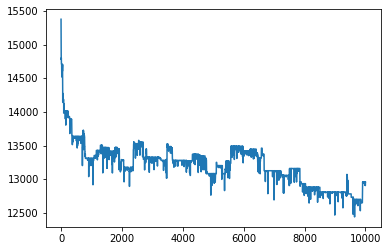

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(gen_threshold),All_GEN_COSTS)
plt.show()

#Satellites of EIL51

In [ ]:
df=df1
Satellites=1
Fuel_Capacity=5000000
Initial_Fuel_Per_Satellite=Fuel_Capacity
Satellites_EIL51_80=satellite_calculation(Satellites,Initial_Fuel_Per_Satellite,Path_EIL51_80,Fuel_Capacity,df)
print("Cost = ",Cost)
print("Path = ",Path)
print("Satellites",Satellites_EIL51_80)

Cost =  12958.296005439111
Path =  [35, 32, 44, 9, 29, 37, 8, 49, 20, 19, 1, 2, 10, 0, 15, 47, 22, 42, 25, 7, 21, 5, 46, 3, 16, 36, 14, 18, 39, 40, 4, 6, 11, 12, 13, 17, 23, 24, 26, 27, 28, 30, 31, 33, 34, 38, 41, 43, 45, 48, 50]
Satellites 3


In [ ]:
df=df1
mutation_rate=0.01
crossover_rate=0.5
gen_threshold=10001
Population_Size=120
Generation,Cost,Path,All_GEN_COSTS,ALL_GEN_POP=RunAlgo(mutation_rate,crossover_rate,gen_threshold,df,Population_Size)
Cost_EIL51_120=Cost
Path_EIL51_120=Path
print("Final Minimum Cost = ",Cost)
print("Final Path = ",Path)
print()

Generation =  0
Cost =  14785.948725306776
Path =  [48, 46, 2, 43, 27, 38, 26, 18, 41, 39, 1, 12, 22, 31, 49, 40, 20, 28, 34, 21, 10, 42, 6, 47, 37, 13, 23, 11, 32, 14, 9, 36, 29, 33, 4, 3, 50, 44, 45, 5, 17, 0, 7, 8, 15, 16, 19, 24, 25, 30, 35]

Generation =  100
Cost =  14139.327176925432
Path =  [35, 27, 26, 25, 22, 21, 7, 6, 5, 4, 47, 46, 3, 45, 2, 50, 24, 23, 31, 0, 1, 19, 34, 33, 8, 9, 10, 11, 13, 14, 44, 48, 15, 16, 12, 17, 18, 20, 28, 29, 30, 32, 36, 37, 38, 39, 40, 41, 42, 43, 49]

Generation =  200
Cost =  13671.398146851581
Path =  [35, 21, 31, 0, 1, 19, 34, 33, 8, 9, 10, 46, 3, 45, 30, 50, 27, 26, 25, 22, 23, 7, 6, 5, 47, 24, 13, 4, 11, 12, 14, 15, 16, 17, 18, 20, 28, 29, 2, 32, 36, 37, 38, 39, 40, 41, 42, 43, 44, 48, 49]

Generation =  300
Cost =  13774.478652088466
Path =  [35, 21, 31, 0, 1, 19, 34, 33, 8, 9, 10, 46, 3, 45, 2, 50, 27, 26, 25, 22, 23, 7, 6, 5, 47, 24, 13, 4, 11, 12, 14, 15, 16, 17, 18, 20, 28, 29, 30, 32, 36, 37, 38, 39, 40, 41, 42, 43, 44, 48, 49]

Genera

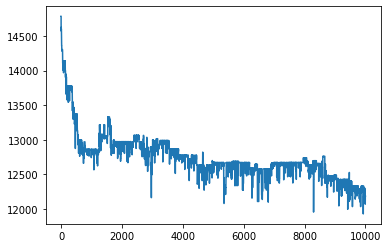

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(gen_threshold),All_GEN_COSTS)
plt.show()

In [ ]:
df=df1
Satellites=1
Fuel_Capacity=3000000
Initial_Fuel_Per_Satellite=Fuel_Capacity
Satellites_EIL51_120=satellite_calculation(Satellites,Initial_Fuel_Per_Satellite,Path_EIL51_120,Fuel_Capacity,df)
print("Cost = ",Cost)
print("Path = ",Path)
print("Satellites",Satellites_EIL51_120)

Cost =  12184.627031538952
Path =  [30, 21, 0, 27, 26, 7, 47, 22, 25, 6, 42, 23, 13, 24, 3, 46, 4, 11, 37, 15, 48, 1, 19, 34, 2, 35, 45, 33, 50, 10, 5, 8, 9, 12, 39, 40, 41, 38, 36, 14, 16, 17, 18, 20, 28, 29, 31, 32, 43, 44, 49]
Satellites 4


In [ ]:
df=df1
mutation_rate=0.01
crossover_rate=0.5
gen_threshold=5001   
Population_Size=160
Generation,Cost,Path,All_GEN_COSTS,ALL_GEN_POP=RunAlgo(mutation_rate,crossover_rate,gen_threshold,df,Population_Size)
Cost_EIL51_160=Cost
Path_EIL51_160=Path
print("Final Minimum Cost = ",Cost)
print("Final Path = ",Path)
print()

Generation =  0
Cost =  15132.11633826583
Path =  [34, 31, 28, 26, 21, 18, 17, 11, 10, 8, 7, 0, 1, 12, 44, 13, 5, 3, 20, 4, 46, 2, 27, 9, 19, 35, 42, 6, 36, 16, 14, 32, 48, 15, 37, 33, 22, 23, 24, 25, 29, 30, 38, 39, 40, 41, 43, 45, 47, 49, 50]

Generation =  100
Cost =  13663.243871391232
Path =  [34, 18, 17, 16, 50, 46, 45, 44, 43, 38, 35, 2, 28, 33, 19, 31, 1, 0, 37, 10, 4, 49, 48, 15, 14, 24, 12, 11, 3, 5, 8, 9, 20, 21, 6, 7, 22, 13, 23, 25, 26, 27, 29, 30, 32, 36, 39, 40, 41, 42, 47]

Generation =  200
Cost =  13700.90726121284
Path =  [34, 18, 17, 16, 50, 46, 45, 44, 43, 38, 35, 2, 28, 33, 19, 31, 1, 0, 37, 10, 4, 49, 48, 15, 14, 13, 12, 11, 3, 5, 8, 9, 20, 21, 6, 7, 22, 23, 24, 25, 26, 27, 29, 30, 32, 36, 39, 40, 41, 42, 47]

Generation =  300
Cost =  13585.592262449767
Path =  [34, 18, 17, 16, 50, 46, 45, 44, 43, 38, 35, 2, 28, 33, 19, 31, 1, 0, 37, 10, 4, 49, 48, 15, 14, 24, 12, 3, 11, 5, 8, 9, 20, 21, 6, 7, 22, 23, 13, 25, 26, 27, 29, 30, 32, 36, 39, 40, 41, 42, 47]

Generati

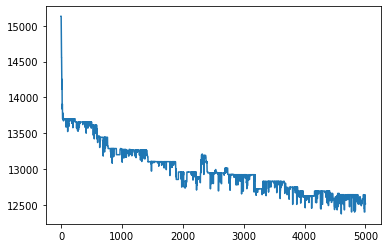

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(gen_threshold),All_GEN_COSTS)
plt.show()

In [ ]:
df=df1
Satellites=1
Fuel_Capacity=1000000
Initial_Fuel_Per_Satellite=Fuel_Capacity
Satellites_EIL51_160=satellite_calculation(Satellites,Initial_Fuel_Per_Satellite,Path_EIL51_160,Fuel_Capacity,df)
print("Cost = ",Cost)
print("Path = ",Path)
print("Satellites",Satellites_EIL51_160)

Cost =  12516.50987437738
Path =  [34, 18, 44, 43, 38, 2, 35, 28, 19, 1, 15, 20, 8, 49, 48, 10, 14, 12, 3, 17, 16, 50, 9, 45, 4, 11, 46, 37, 31, 21, 26, 47, 0, 5, 7, 13, 22, 23, 6, 24, 25, 27, 29, 30, 32, 33, 36, 39, 40, 41, 42]
Satellites 12


#**SP11**

In [ ]:
df=df2
mutation_rate=0.01
crossover_rate=0.5
gen_threshold=1001
Population_Size=160
Generation,Cost,Path,All_GEN_COSTS,ALL_GEN_POP=RunAlgo(mutation_rate,crossover_rate,gen_threshold,df,Population_Size)
Cost_SP11=Cost
Path_SP11=Path
print("Final Minimum Cost = ",Cost)
print("Final Path = ",Path)
print()

Generation =  0
Cost =  2702.3261458787483
Path =  [0, 4, 7, 2, 3, 6, 5, 1, 8, 9, 10]

Generation =  100
Cost =  2356.556650665631
Path =  [0, 10, 8, 7, 1, 9, 5, 2, 3, 4, 6]

Generation =  200
Cost =  2336.169808301052
Path =  [0, 10, 8, 7, 1, 4, 3, 6, 5, 2, 9]

Generation =  300
Cost =  2303.2570272153766
Path =  [4, 10, 8, 7, 1, 0, 3, 2, 5, 6, 9]

Generation =  400
Cost =  2279.0530979187356
Path =  [0, 10, 8, 4, 1, 7, 3, 6, 5, 2, 9]

Generation =  500
Cost =  2316.8128208907247
Path =  [0, 10, 8, 4, 1, 7, 3, 2, 5, 6, 9]

Generation =  600
Cost =  2291.309622830078
Path =  [0, 10, 8, 4, 7, 1, 3, 2, 5, 6, 9]

Generation =  700
Cost =  2250.267665907289
Path =  [0, 10, 8, 4, 7, 1, 3, 6, 2, 5, 9]

Generation =  800
Cost =  2291.309622830078
Path =  [0, 10, 8, 4, 7, 1, 3, 2, 5, 6, 9]

Generation =  900
Cost =  2291.309622830078
Path =  [0, 10, 8, 4, 7, 1, 3, 2, 5, 6, 9]

Generation =  1000
Cost =  2267.396169767836
Path =  [0, 10, 7, 4, 8, 1, 3, 2, 5, 6, 9]

Final Minimum Cost =  2267.39

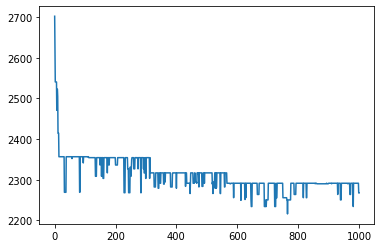

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(gen_threshold),All_GEN_COSTS)
plt.show()

In [ ]:
df=df2
Satellites=1
Fuel_Capacity=750000
Initial_Fuel_Per_Satellite=Fuel_Capacity
Satellites_SP11_160=satellite_calculation(Satellites,Initial_Fuel_Per_Satellite,Path,Fuel_Capacity,df)
print("Cost = ",Cost)
print("Path = ",Path)
print("Satellites",Satellites_SP11_160)

Cost =  2267.396169767836
Path =  [0, 10, 7, 4, 8, 1, 3, 2, 5, 6, 9]
Satellites 3


#**UK12**

In [ ]:
df=df3
mutation_rate=0.01
crossover_rate=0.5
gen_threshold=1001
Population_Size=160
Generation,Cost,Path,All_GEN_COSTS,ALL_GEN_POP=RunAlgo(mutation_rate,crossover_rate,gen_threshold,df,Population_Size)
Cost_UK12=Cost
Path_UK12=Path
print("Final Minimum Cost = ",Cost)
print("Final Path = ",Path)
print()

Generation =  0
Cost =  9165.076613462857
Path =  [0, 2, 4, 9, 6, 10, 5, 1, 3, 7, 8, 11]

Generation =  100
Cost =  8716.801015042125
Path =  [0, 2, 4, 9, 5, 1, 6, 10, 3, 7, 8, 11]

Generation =  200
Cost =  8687.166956223626
Path =  [0, 2, 9, 4, 5, 1, 6, 10, 3, 7, 8, 11]

Generation =  300
Cost =  8687.166956223626
Path =  [0, 2, 9, 4, 5, 1, 6, 10, 3, 7, 8, 11]

Generation =  400
Cost =  8687.166956223626
Path =  [0, 2, 9, 4, 5, 1, 6, 10, 3, 7, 8, 11]

Generation =  500
Cost =  8687.166956223626
Path =  [0, 2, 9, 4, 5, 1, 6, 10, 3, 7, 8, 11]

Generation =  600
Cost =  8687.166956223626
Path =  [0, 2, 9, 4, 5, 1, 6, 10, 3, 7, 8, 11]

Generation =  700
Cost =  8687.166956223626
Path =  [0, 2, 9, 4, 5, 1, 6, 10, 3, 7, 8, 11]

Generation =  800
Cost =  8687.166956223626
Path =  [0, 2, 9, 4, 5, 1, 6, 10, 3, 7, 8, 11]

Generation =  900
Cost =  8687.166956223626
Path =  [0, 2, 9, 4, 5, 1, 6, 10, 3, 7, 8, 11]

Generation =  1000
Cost =  8624.92222043133
Path =  [0, 2, 9, 4, 5, 1, 10, 6, 3, 7

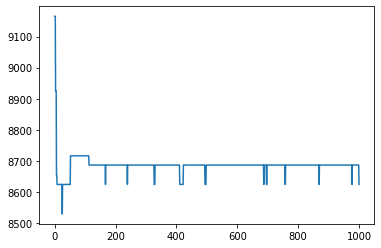

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(gen_threshold),All_GEN_COSTS)
plt.show()

In [ ]:
df=df3
Satellites=1
Fuel_Capacity=3000000
Initial_Fuel_Per_Satellite=Fuel_Capacity
Satellites_UK12=satellite_calculation(Satellites,Initial_Fuel_Per_Satellite,Path,Fuel_Capacity,df)
print("Cost = ",Cost)
print("Path = ",Path)
print("Satellites",Satellites_UK12)

Cost =  8624.92222043133
Path =  [0, 2, 9, 4, 5, 1, 10, 6, 3, 7, 8, 11]
Satellites 3


#**SGB128**

In [ ]:
df=df4
mutation_rate=0.01
crossover_rate=0.5
gen_threshold=5001
Population_Size=160
Generation,Cost,Path,All_GEN_COSTS,ALL_GEN_POP=RunAlgo(mutation_rate,crossover_rate,gen_threshold,df,Population_Size)
Cost_SGB128=Cost
Path_SGB128=Path
print("Final Minimum Cost = ",Cost)
print("Final Path = ",Path)
print()

Generation =  0
Cost =  246062.538895468
Path =  [126, 125, 124, 122, 120, 119, 115, 113, 112, 110, 105, 100, 98, 97, 96, 93, 92, 90, 89, 85, 77, 76, 74, 72, 70, 64, 61, 60, 58, 52, 50, 49, 48, 47, 45, 44, 42, 39, 38, 37, 35, 32, 30, 29, 27, 25, 23, 22, 21, 20, 10, 9, 8, 67, 17, 116, 68, 75, 88, 118, 31, 1, 55, 81, 86, 69, 54, 78, 65, 62, 53, 51, 107, 121, 106, 57, 36, 24, 56, 73, 82, 12, 4, 3, 2, 0, 94, 123, 43, 28, 33, 41, 80, 83, 34, 103, 59, 108, 40, 111, 109, 127, 7, 104, 117, 95, 91, 79, 66, 15, 101, 84, 19, 102, 63, 114, 26, 87, 99, 71, 46, 5, 6, 11, 13, 14, 16, 18]

Generation =  100
Cost =  227793.55181515217
Path =  [33, 32, 31, 30, 29, 54, 53, 51, 49, 48, 0, 1, 107, 106, 104, 103, 102, 95, 100, 99, 74, 105, 101, 98, 125, 124, 122, 120, 119, 118, 117, 116, 115, 113, 112, 111, 123, 121, 114, 97, 96, 94, 93, 92, 90, 89, 88, 87, 86, 85, 84, 26, 25, 126, 127, 83, 82, 81, 80, 79, 28, 27, 3, 4, 5, 6, 7, 8, 9, 10, 11, 109, 108, 12, 13, 14, 15, 77, 76, 75, 73, 72, 71, 16, 2, 17, 18, 

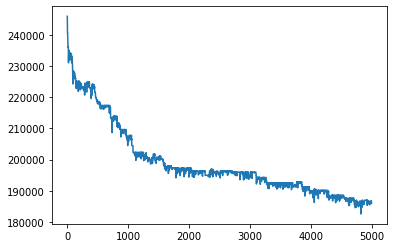

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(gen_threshold),All_GEN_COSTS)
plt.show()

In [ ]:
df=df4
Satellites=1
Fuel_Capacity=19000000
Initial_Fuel_Per_Satellite=Fuel_Capacity
Satellites_SGB128=satellite_calculation(Satellites,Initial_Fuel_Per_Satellite,Path,Fuel_Capacity,df)
print("Cost = ",Cost)
print("Path = ",Path)
print("Satellites",Satellites_SGB128)

Cost =  185934.99561608167
Path =  [33, 32, 31, 29, 54, 99, 2, 105, 59, 90, 125, 93, 101, 17, 18, 43, 123, 121, 114, 96, 44, 92, 98, 89, 88, 87, 86, 85, 84, 26, 25, 126, 97, 116, 55, 0, 81, 80, 79, 28, 27, 61, 7, 127, 119, 15, 118, 19, 50, 13, 14, 75, 73, 72, 94, 1, 122, 6, 20, 4, 22, 24, 34, 10, 83, 82, 11, 106, 111, 3, 66, 9, 63, 23, 45, 36, 37, 5, 8, 12, 16, 64, 109, 21, 30, 35, 38, 39, 40, 41, 42, 48, 49, 51, 46, 47, 52, 53, 56, 57, 58, 60, 62, 65, 67, 68, 69, 70, 71, 74, 76, 77, 78, 91, 95, 100, 102, 103, 104, 107, 108, 110, 112, 113, 115, 117, 120, 124]
Satellites 10


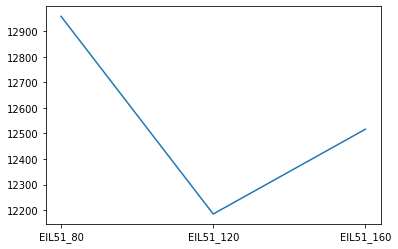

In [ ]:
Costs=[Cost_EIL51_80,Cost_EIL51_120,Cost_EIL51_160]
X=['EIL51_80','EIL51_120','EIL51_160']
plt.plot(X,Costs)
plt.show()

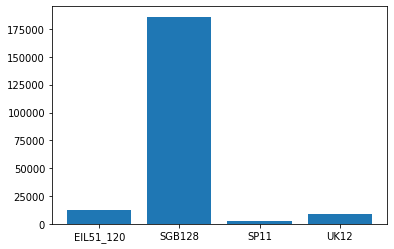

In [ ]:
Costs=[Cost_EIL51_120,Cost_SGB128,Cost_SP11,Cost_UK12]
X=['EIL51_120','SGB128','SP11','UK12']
plt.bar(X,Costs)
plt.show()

In [ ]:
#Data per satellite
from tabulate import tabulate
mydata = [
	["EIL51_80 , Population=80", (Cost_EIL51_80)/Satellites_EIL51_80],    
	["EIL51_120 , Population=120", (Cost_EIL51_120)/Satellites_EIL51_120],
	["EIL51_160 , Population=160", (Cost_EIL51_160)/Satellites_EIL51_160], 
	["SGB128 , Population=160", (Cost_SGB128)/Satellites_SGB128],  
	["SP11 , Population=160", (Cost_SP11)/Satellites_SP11_160],      
	["UK12 , Population=160", (Cost_UK12)/Satellites_UK12]      
]
head = ["DATASET","Costs per satellite"]
print(tabulate(mydata, headers=head, tablefmt="grid"))

+----------------------------+-----------------------+
| DATASET                    |   Costs per satellite |
+============================+=======================+
| EIL51_80 , Population=80   |              4319.43  |
+----------------------------+-----------------------+
| EIL51_120 , Population=120 |              3046.16  |
+----------------------------+-----------------------+
| EIL51_160 , Population=160 |              1043.04  |
+----------------------------+-----------------------+
| SGB128 , Population=160    |             18593.5   |
+----------------------------+-----------------------+
| SP11 , Population=160      |               755.799 |
+----------------------------+-----------------------+
| UK12 , Population=160      |              2874.97  |
+----------------------------+-----------------------+


In [ ]:
#Data of paper "An Efficient Genetic Algorithm for Active Space Debris Removal Planning"
from tabulate import tabulate
mydata = [
	["EIL51_80 , Population=80", 477],
	["EIL51_120 , Population=120", 532],
	["EIL51_160 , Population=160", 727],
	["SGB128 , Population=160",38789],
	["SP11 , Population=160", 135],
	["UK12 , Population=160", 2295]
]
head = ["DATASET", "Costs per satellite"]
print(tabulate(mydata, headers=head, tablefmt="grid"))

+----------------------------+-----------------------+
| DATASET                    |   Costs per satellite |
+============================+=======================+
| EIL51_80 , Population=80   |                   477 |
+----------------------------+-----------------------+
| EIL51_120 , Population=120 |                   532 |
+----------------------------+-----------------------+
| EIL51_160 , Population=160 |                   727 |
+----------------------------+-----------------------+
| SGB128 , Population=160    |                 38789 |
+----------------------------+-----------------------+
| SP11 , Population=160      |                   135 |
+----------------------------+-----------------------+
| UK12 , Population=160      |                  2295 |
+----------------------------+-----------------------+
